### 1. Import the data. Analyse the dimensions of the data. Visualise the data. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import cv2

X_train = []
y_train = []

for i in os.listdir('drive/MyDrive/Colab_Notebooks/Plant_Seedling_Classification_Data/train'):
    print(i)          
    for j in os.listdir('drive/MyDrive/Colab_Notebooks/Plant_Seedling_Classification_Data/train/' + i):
      # read each image inside train directory one by one
      dummy = cv2.imread('drive/MyDrive/Colab_Notebooks/Plant_Seedling_Classification_Data/train/' + i + "/" + j)
      dummy = cv2.resize(dummy, (128, 128))
      X_train.append(dummy)
      y_train.append(i)

Scentless Mayweed
Common wheat
Cleavers
Fat Hen
Small-flowered Cranesbill
Maize
Common Chickweed
Loose Silky-bent
Sugar beet
Shepherds Purse
Charlock
Black-grass


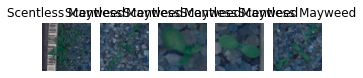

In [3]:
# VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns

N=5  # NUMBER OF IMAGES TO SEE

plt.figure(figsize=(N, 1))
for i in range(N):
    plt.subplot(1, N, i+1)
    plt.imshow(X_train[i], cmap="gray")  #rgb
    plt.title("{}".format(y_train[i]))
    plt.axis('off')
plt.show()

### 2. Train tune and test AIML image classifier model using: 

In [4]:
from sklearn.model_selection import train_test_split

X_train_ML, X_val_ML, y_train_ML, y_val_ML = train_test_split(X_train, y_train, test_size=0.2, random_state=2)

print(len(X_train_ML))
print(len(X_val_ML))

3813
954


In [5]:
import numpy as np

X_train = np.array(X_train_ML)
X_train.shape

(3813, 128, 128, 3)

In [7]:
X_test = np.array(X_val_ML)
X_test.shape

(954, 128, 128, 3)

In [8]:
X_train[0]

array([[[ 95, 119, 129],
        [ 58,  81,  95],
        [ 36,  56,  72],
        ...,
        [ 34,  37,  51],
        [ 31,  34,  48],
        [ 26,  28,  42]],

       [[ 93, 123, 133],
        [ 63,  89, 103],
        [ 38,  58,  76],
        ...,
        [ 35,  40,  54],
        [ 32,  35,  50],
        [ 26,  28,  43]],

       [[ 88, 124, 134],
        [ 60,  90, 106],
        [ 38,  60,  79],
        ...,
        [ 44,  50,  62],
        [ 38,  43,  57],
        [ 29,  32,  46]],

       ...,

       [[ 38,  59,  79],
        [ 43,  63,  80],
        [ 48,  65,  82],
        ...,
        [ 48,  57,  65],
        [ 46,  56,  65],
        [ 38,  50,  61]],

       [[ 37,  59,  79],
        [ 44,  63,  81],
        [ 46,  65,  82],
        ...,
        [ 59,  67,  75],
        [ 47,  56,  65],
        [ 40,  50,  62]],

       [[ 26,  51,  70],
        [ 43,  64,  82],
        [ 45,  64,  81],
        ...,
        [ 48,  55,  63],
        [ 40,  49,  59],
        [ 36,  46,  57]]

In [9]:
X_test[0]

array([[[ 38,  56,  80],
        [ 35,  48,  68],
        [ 48,  55,  72],
        ...,
        [ 70,  95, 117],
        [ 60,  84, 106],
        [ 67,  85, 105]],

       [[ 48,  67,  86],
        [ 65,  80,  94],
        [ 44,  53,  76],
        ...,
        [ 65,  87, 109],
        [ 52,  67,  92],
        [ 68,  86, 106]],

       [[ 55,  74,  91],
        [ 70,  90, 108],
        [ 77,  95, 115],
        ...,
        [ 28,  38,  65],
        [ 51,  66,  90],
        [ 70,  90, 110]],

       ...,

       [[ 61,  79, 101],
        [ 62,  83, 101],
        [ 52,  71,  92],
        ...,
        [ 35,  45,  62],
        [ 37,  48,  69],
        [ 29,  42,  63]],

       [[124, 139, 146],
        [ 79,  92, 110],
        [ 52,  68,  91],
        ...,
        [ 49,  70,  83],
        [ 56,  76,  90],
        [ 50,  71,  84]],

       [[127, 145, 151],
        [ 99, 114, 129],
        [ 43,  58,  79],
        ...,
        [ 71,  88,  99],
        [ 70,  83,  96],
        [ 68,  87,  98]]

In [12]:
train_X = X_train.astype('float32')
train_X = X_train.reshape(X_train.shape[0],128,128,3)
train_X = X_train / 255.

test_X = X_test.astype('float32')
test_X = X_test.reshape(X_test.shape[0], 128,128,3)
test_X = X_test / 255.

print('\nTraining data : ', train_X.shape)

print('\nTesting data : ', test_X.shape)


Training data :  (3813, 128, 128, 3)

Testing data :  (954, 128, 128, 3)


In [13]:
# Flatten

x_train = []
for i in range(1000):
    x_train.append(train_X[i,:].flatten())

x_test = []
for i in range(500):
    x_test.append(test_X[i,:].flatten())

train_Y=y_train_ML[0:1000]
test_Y=y_val_ML[0:500]

print("\n Training data:",len(x_train))
print("\n Training Target data:",len(train_Y))
print("\n Testing data:",len(x_test))
print("\n Testing Target data:",len(test_Y))


 Training data: 1000

 Training Target data: 1000

 Testing data: 500

 Testing Target data: 500


In [14]:
# Logistic Regression

from sklearn. linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier


LogR = LogisticRegression()
LogR.fit(x_train, train_Y)

y_pred=LogR.predict(x_train)
LogR_Accuracy_Train = accuracy_score(y_true=train_Y, y_pred=y_pred)
print("Train Accuracy : ", LogR_Accuracy_Train)

y_pred = LogR.predict(x_test)
LogR_Accuracy_Test = accuracy_score(y_true=test_Y, y_pred=y_pred)
print("Test Accuracy : ", LogR_Accuracy_Test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train Accuracy :  0.999
Test Accuracy :  0.392


In [15]:
# NB

from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

k=[BernoulliNB,GaussianNB]
for i in range (len(k)):
    NB_Classifier = k[i]()
    NB_Classifier.fit(x_train, train_Y)
    print ('kernel is =',k[i], '\tScore=',NB_Classifier.score(x_test, test_Y))

kernel is = <class 'sklearn.naive_bayes.BernoulliNB'> 	Score= 0.178
kernel is = <class 'sklearn.naive_bayes.GaussianNB'> 	Score= 0.226


In [16]:
# NB - Model

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

NB = GaussianNB()
NB.fit(x_train, train_Y)

y_pred = NB.predict(x_train)
NB_Accuracy_Train=accuracy_score(train_Y, y_pred, normalize = True)
print("Train Accuracy: ", NB_Accuracy_Train)

y_pred = NB.predict(x_test)
NB_Accuracy_Test=accuracy_score(test_Y, y_pred, normalize = True)
print("Test Accuracy : ", NB_Accuracy_Test)

Train Accuracy:  0.305
Test Accuracy :  0.226


In [17]:
# SVM - Model
from sklearn.svm import SVC
SVM = SVC(C=0.9,kernel='linear')
SVM.fit(x_train, train_Y)

SVM_Accuracy=SVM.score(x_train, train_Y)
print("Train Accuracy : ", SVM_Accuracy)

SVM_Accuracy=SVM.score(x_test, test_Y)
print("Test Accuracy : ", SVM_Accuracy)

Train Accuracy :  1.0
Test Accuracy :  0.42


In [18]:
# KNN - Model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

KNN = KNeighborsClassifier(n_neighbors=19)
KNN.fit(x_train, train_Y)

y_pred = KNN.predict(x_train)
KNN_Accuracy_Train=accuracy_score(train_Y, y_pred)
print("Train Accuracy : ", KNN_Accuracy_Train)

y_pred = KNN.predict(x_test)
KNN_Accuracy_Test=accuracy_score(test_Y, y_pred)
print("Test Accuracy : ", KNN_Accuracy_Test)

Train Accuracy :  0.342
Test Accuracy :  0.248


In [19]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

model_DT=DecisionTreeClassifier(criterion='entropy',
                                splitter='best',
                                max_depth=5,
                                min_samples_split=2,
                                min_samples_leaf=1,
                                min_weight_fraction_leaf=0.0,
                                max_features=None,
                                random_state=None,
                                max_leaf_nodes=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None,
                                class_weight=None,
                                presort='deprecated',
                                ccp_alpha=0.0,)

model_DT.fit(x_train, train_Y)

DT_Train=model_DT.score(x_train, train_Y)
DT_Test=model_DT.score(x_test, test_Y)

print("Train Accuracy:",DT_Train)
print("Test Accuracy:",DT_Test)

Train Accuracy: 0.442
Test Accuracy: 0.196


In [20]:
# RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model_RF = RandomForestClassifier(n_estimators=20,
                                    criterion='gini',
                                    max_depth=None,
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    min_weight_fraction_leaf=0.0,
                                    max_features='auto',
                                    max_leaf_nodes=None,
                                    min_impurity_decrease=0.0,
                                    min_impurity_split=None,
                                    bootstrap=True,
                                    oob_score=False,
                                    n_jobs=None,
                                    random_state=None,
                                    verbose=0,
                                    warm_start=False,
                                    class_weight=None,
                                    ccp_alpha=0.0,
                                    max_samples=None,)
model_RF.fit(x_train, train_Y)

pred_RF = model_RF.predict(x_test)
RF_Train = model_RF.score(x_train, train_Y)
RF_Test = accuracy_score(test_Y, pred_RF)   


print("Train Accuracy:",RF_Train)
print("Test Accuracy:",RF_Test)

Train Accuracy: 1.0
Test Accuracy: 0.314


In [21]:
# ADA Boosting

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

model = AdaBoostClassifier( base_estimator=None,    # SVC(), RandomForestClassifier(), GradientBoostingClassifier()
                            n_estimators=10,
                            learning_rate=1.0,
                            algorithm='SAMME.R',     # try using SVC() as base estimator above
                            random_state=None,)
model_AB = model.fit(x_train, train_Y)

AB_Train = model_AB.score(x_train, train_Y)
pred_AB =model_AB.predict(x_test)
acc_AB = accuracy_score(test_Y, pred_AB)

print("Train Accuracy:",AB_Train)
print("Test Accuracy:",acc_AB)

Train Accuracy: 0.244
Test Accuracy: 0.198


In [22]:
# GRADIENT BOOSTING


from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(loss='deviance',
                                    learning_rate=0.1,
                                    n_estimators=10,
                                    subsample=1.0,
                                    criterion='friedman_mse',
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    min_weight_fraction_leaf=0.0,
                                    max_depth=3,
                                    min_impurity_decrease=0.0,
                                    min_impurity_split=None,
                                    init=None,
                                    random_state=None,
                                    max_features=None,
                                    verbose=1,
                                    max_leaf_nodes=None,
                                    warm_start=False,
                                    presort='deprecated',
                                    validation_fraction=0.1,
                                    n_iter_no_change=None,
                                    tol=0.0001,
                                    ccp_alpha=0.0)
model_GB = model.fit(x_train, train_Y)

GB_Train = model_GB.score(x_train, train_Y)
pred_GB =model_GB.predict(x_test)
acc_GB = accuracy_score(test_Y, pred_GB)

print("Training Accuracy:",GB_Train)
print("Testing Accuracy:",acc_GB)

      Iter       Train Loss   Remaining Time 
         1        2049.3730           16.02m
         2        1826.9941           14.17m
         3        1654.3381           12.39m
         4        1502.8788           10.62m
         5        1386.6177            8.84m
         6        1278.0796            7.07m
         7        1177.1869            5.29m
         8        1097.9020            3.53m
         9        1019.3815            1.76m
        10         946.2879            0.00s
Training Accuracy: 0.94
Testing Accuracy: 0.358


In [25]:
# Comparison 
import pandas as pd

Comparison1 = pd.DataFrame({'Method':['Logistic Regression'], 'Train accuracy': LogR_Accuracy_Train, 
                           'Test accuracy': LogR_Accuracy_Test})
Comparison1 = Comparison1[['Method', 'Train accuracy', 'Test accuracy']]


Comparison2 = pd.DataFrame({'Method':['Naive Bayes Regression'], 'Train accuracy': NB_Accuracy_Train, 
                           'Test accuracy': NB_Accuracy_Test},)
Comparison2 = Comparison2[['Method', 'Train accuracy', 'Test accuracy']]


Comparison3 = pd.DataFrame({'Method':['KNN'], 'Train accuracy': KNN_Accuracy_Train, 
                           'Test accuracy': KNN_Accuracy_Test})
Comparison3 = Comparison3[['Method', 'Train accuracy', 'Test accuracy']]


Comparison4 = pd.DataFrame({'Method':['SVM'], 'Train accuracy': DT_Train, 
                           'Test accuracy': DT_Test})
Comparison4 = Comparison4[['Method', 'Train accuracy', 'Test accuracy']]


Comparison5 = pd.DataFrame({'Method':['Decision Tree'], 'Train accuracy': LogR_Accuracy_Train, 
                            'Test accuracy': LogR_Accuracy_Test})
Comparison5 = Comparison5[['Method', 'Train accuracy', 'Test accuracy']]



Comparison6 = pd.DataFrame({'Method':['Random Forest'], 'Train accuracy': RF_Train, 
                           'Test accuracy': RF_Test})
Comparison6 = Comparison6[['Method', 'Train accuracy', 'Test accuracy']]



Comparison7 = pd.DataFrame({'Method':['Gradient Boosting'], 'Train accuracy': GB_Train, 
                           'Test accuracy': acc_GB})
Comparison7 = Comparison7[['Method', 'Train accuracy', 'Test accuracy']]



Comparison8 = pd.DataFrame({'Method':['ADA Boosting'], 'Train accuracy': AB_Train, 
                           'Test accuracy': acc_AB})
Comparison8 = Comparison8[['Method', 'Train accuracy', 'Test accuracy']]

Comparison = pd.concat([Comparison1, Comparison2,Comparison3,Comparison4,Comparison5,Comparison6,
                        Comparison7,Comparison8])

Comparison

,Method,Train accuracy,Test accuracy
0,Logistic Regression,0.999,0.392
0,Naive Bayes Regression,0.305,0.226
0,KNN,0.342,0.248
0,SVM,0.442,0.196
0,Decision Tree,0.999,0.392
0,Random Forest,1.000,0.314
0,Gradient Boosting,0.940,0.358
0,ADA Boosting,0.244,0.198


### Image classifier - Neural Networks

In [35]:
X_train.shape[0]

3813

In [36]:
from sklearn.model_selection import train_test_split

y_train= y_train[:3813]
X_train_ML, X_val_ML, y_train_ML, y_val_ML = train_test_split(X_train, y_train, test_size=0.2, random_state=2)

print(len(X_train_ML))
print(len(X_val_ML))

3050
763


In [37]:
import numpy as np

X_train = np.array(X_train_ML)
X_train.shape

(3050, 128, 128, 3)

In [38]:
import numpy as np

X_test = np.array(X_val_ML)
X_test.shape

(763, 128, 128, 3)

In [39]:
X_train = X_train.astype('float32')
X_train = X_train.reshape(X_train.shape[0], 49152) # 128 * 128 * 3
X_train = X_train / 255.

X_test = X_test.astype('float32')
X_test = X_test.reshape(X_test.shape[0], 49152)
X_test = X_test / 255.

print('\nTraining data : ', X_train.shape)

print('\nTesting data : ', X_test.shape)


Training data :  (3050, 49152)

Testing data :  (763, 49152)


In [40]:
from keras.utils import np_utils
import pandas as pd
# one hot encode
y_train = pd.get_dummies(y_train_ML)
y_test = pd.get_dummies(y_val_ML)

num_classes = y_test.shape[1]
num_hidden = 10

In [41]:
from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3050, 49152)
(3050, 9)
(763, 49152)
(763, 9)


In [45]:
import keras
from tensorflow.keras.optimizers import Adam
from keras import losses
from keras import optimizers
from keras.layers import Dropout, MaxPooling2D
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense, Activation


# create model
model = Sequential()  
model.add(BatchNormalization(input_shape = (49152,)))  # Batch_Norm Layer
    
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
    
# Compile model
adam = Adam(lr=1e-3)
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy']) # Loss function = Categorical cross entropy

# Fit
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=20, verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
153/153 [==============================] - 5s 15ms/step - loss: 3.6472 - accuracy: 0.1377 - val_loss: 2.2302 - val_accuracy: 0.1573
Epoch 2/5
153/153 [==============================] - 2s 13ms/step - loss: 2.1799 - accuracy: 0.1784 - val_loss: 2.2176 - val_accuracy: 0.1651
Epoch 3/5
153/153 [==============================] - 2s 13ms/step - loss: 2.1409 - accuracy: 0.1934 - val_loss: 2.1957 - val_accuracy: 0.1599
Epoch 4/5
153/153 [==============================] - 2s 13ms/step - loss: 2.0990 - accuracy: 0.2016 - val_loss: 2.1817 - val_accuracy: 0.1664
Epoch 5/5
153/153 [==============================] - 2s 13ms/step - loss: 2.0640 - accuracy: 0.2092 - val_loss: 2.1819 - val_accuracy: 0.1560


### Image classifier - CNN 

In [46]:
from sklearn.model_selection import train_test_split


X_train_CNN, X_val_CNN, y_train_CNN, y_val_CNN = train_test_split(X_train, y_train, test_size=0.2, random_state=2)

print(len(X_train_CNN))
print(len(X_val_CNN))

2440
610


In [47]:
import pandas as pd

y_train = pd.get_dummies(y_train_CNN).values
import numpy as np

X_train = np.array(X_train_CNN)

In [48]:

print('\nTraining data : ', X_train.shape, y_train.shape)



Training data :  (2440, 49152) (2440, 9)


In [49]:
y_train[2]


array([1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2)

print(len(X_train))
print(len(X_val))

1952
488


In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D

# model architecture building
model = Sequential()

model.add(BatchNormalization(input_shape = (128, 128, 3)))

model.add(Convolution2D(filters = 32, kernel_size = 3, activation ='relu', input_shape = (128, 128, 3))) 
model.add(MaxPooling2D(pool_size = 2))

model.add(Convolution2D(filters = 64, kernel_size = 4, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))

model.add(Convolution2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))

model.add(Convolution2D(filters = 128, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))

model.add(Flatten()) 

# fully connected layer
model.add(Dense(units = 128,activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))

model.add(Dense(units = 12, activation = 'softmax')) 

In [52]:
optimizer = Adam(lr=0.001)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_3 (Batch (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 63, 63, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 128)      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [58]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(1952, 49152)
(1952, 9)
(488, 49152)
(488, 9)


In [1]:
x_train=X_train.reshape(1,1952, 49152,3)
Y_train=y_train.reshape(1,1952, 9,3)
x_val=X_val.reshape(1,488, 49152,3)
Y_val=y_val.reshape(1,488, 9,3)
# model.fit(X_train, y_train, epochs = 10, validation_data = (X_val, y_val), initial_epoch=0)
model.fit(x_train, Y_train, epochs = 10, validation_data = (x_val, Y_val), initial_epoch=0)


NameError: ignored

In [ ]:
scores = model.evaluate(X_val, y_val)
print('Loss: {}, Accuracy: {}'.format(scores[0], scores[1]))

### 3. Compare the results from the above step along with your detailed observations.  


### 4. Pickle the best performing  model.  

In [ ]:
from keras.models import model_from_json
import numpy
import os

CNN_model_json =model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(CNN_model_json)
# Pickle weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

### 5. Import the the image in the “ Prediction” folder to predict the class. Display the image. Use the best trained image classifier model to predict the class. 

In [ ]:
import os
import cv2
import numpy as np

Predict_Image = []

# read each image one by one
P = cv2.imread('drive/MyDrive/Colab_Notebooks/Plant_Seedling_Classification_Data/Predict.png')
P = cv2.resize(P, (128, 128))
Predict_Image.append(dummy)

PI=np.array(Predict_Image)

Predict_Image=PI.reshape(1,128,128,3)

In [ ]:
Predict_Image

In [ ]:
from PIL import Image  
  
im = Image.open(r"drive/MyDrive/Colab_Notebooks/Plant_Seedling_Classification_Data/Predict.png")  

im.show() 

In [ ]:
result=model.predict(Predict_Image)
result

In [ ]:
np.argmax(result) 

Image classification gave the result as '7' during initial runtime, which is "Maize"
